<a href="https://colab.research.google.com/github/nidaa-hub/HaifaUniv_AI_Lab_2022/blob/main/AI_2022_Lab_5_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Press ▶ or ctrl+Enter
* ID Submetter1: 316151232
* ID Submetter2: 038163630

In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#///////////////////////lab 5.2///////////////////////
# importing lybraries and defininig functions
import time
import sys
import math
from timeit import default_timer as timer
import random
from random import randint, random, randrange
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from numpy.random import choice, uniform
import numpy as np
import pandas as pd
from pandas import DataFrame
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
!pip install pyforest
from pyforest import *
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy

CRED = '\033[91m'
CGREEN = '\033[92m'
CFLASH = '\033[5m'
CBOLD = '\33[1m'
CITALIC = '\33[3m'
CEND = '\033[0m'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=45b1f51037976c3c3d52c1455cb222a7a02cd32ebe4695173241152435e9e319
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [4]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
df = pd.read_csv(target_url, header=None)
df.columns = ['', '', '', '', '', '','', '', '', '', 'GlassType']
print('Data:')
df.head()

<IPython.core.display.Javascript object>

Data:


,,,,,,,,,,,GlassType
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
!pip install ppscore
import ppscore as pps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13068 sha256=335095ca9042cbf6197cba303cc534bc22983dec8539e5d1319fdad47b60dc4e
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


ContextualVersionConflict: ignored

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [7]:
df['GlassType'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: GlassType, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 720x360 with 0 Axes>

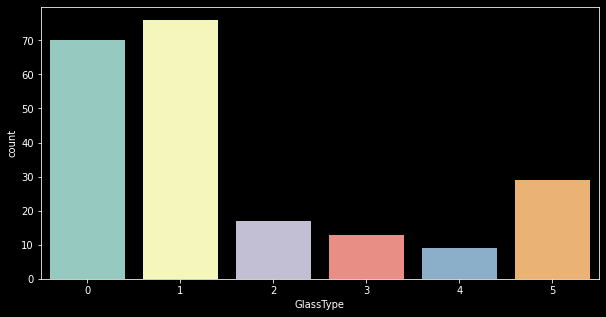

In [8]:
import pandas.testing as tm
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
figure, ax = plt.subplots(1,1, figsize=(10,5))
sns.countplot(x = 'GlassType', data=df)
ax.set_xticklabels( ('0','1','2','3','4','5') )
plt.show()

In [9]:
last_column,data = df.values[:, -1],df.values[:,1:-1]
labels = LabelEncoder().fit_transform(last_column)
X=preprocessing.normalize(data)
normalized = DataFrame(MinMaxScaler().fit_transform(data))
print(normalized)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

            0         1         2         3         4         5         6  \
0    0.432836  0.437594  1.000000  0.252336  0.351786  0.009662  0.308550   
1    0.283582  0.475188  0.801782  0.333333  0.521429  0.077295  0.223048   
2    0.220808  0.421053  0.790646  0.389408  0.567857  0.062802  0.218401   
3    0.285777  0.372932  0.821826  0.311526  0.500000  0.091787  0.259294   
4    0.275241  0.381955  0.806236  0.295950  0.583929  0.088567  0.245353   
..        ...       ...       ...       ...       ...       ...       ...   
209  0.223003  0.512782  0.000000  0.806854  0.500000  0.012882  0.348513   
210  0.250219  0.630075  0.000000  0.529595  0.580357  0.000000  0.276022   
211  0.417032  0.545865  0.000000  0.538941  0.644643  0.000000  0.279740   
212  0.235294  0.548872  0.000000  0.514019  0.678571  0.000000  0.283457   
213  0.261633  0.526316  0.000000  0.557632  0.633929  0.000000  0.296468   

            7    8  
0    0.000000  0.0  
1    0.000000  0.0  
2    0.00000

In [10]:
print(df)
x_train, x_test, y_train, y_test = train_test_split(normalized,labels,stratify=labels,test_size=0.2,random_state=42)
print('x_train :',x_train.shape,'   |   x_test :',x_test.shape)
print('y_train :',y_train.shape,'   |   y_test :',y_test.shape)

                                                                    GlassType
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0          1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0          1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0          1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0          1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0          1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...        ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0          7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0          7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0          7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0          7
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0          7

[214 rows x 11 columns]


<IPython.core.display.Javascript object>

x_train : (171, 9)    |   x_test : (43, 9)
y_train : (171,)    |   y_test : (43,)


In [11]:
from sklearn import neural_network
from sklearn.metrics import classification_report
clf = neural_network.MLPClassifier(max_iter=5000,hidden_layer_sizes=(9,6))
clf.fit(x_train,y_train)

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

#Predict
y_pred = clf.predict(x_test)
#y_pred = softmax(x_pred)

#Score
acu = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test,y_pred)
print(CGREEN + "Confusion matrix:\n",cm)

print(CBOLD + "\n Accuracy of ANN:",acu)
print("\n"+ CEND)
print(classification_report(y_test, y_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion matrix:
 [[ 9  5  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  0  0  0  3]
 [ 0  1  0  0  0  1]
 [ 0  0  0  1  0  5]]

 Accuracy of ANN: 0.6046511627906976


              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.63      0.80      0.71        15
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.56      0.83      0.67         6

    accuracy                           0.60        43
   macro avg       0.31      0.38      0.34        43
weighted avg       0.52      0.60      0.56        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


In [12]:
print('clf : ')
print(clf)
print('predict : ')
print(clf.predict_proba(x_test[:1]))
xMLP = clf.predict_proba(x_test[:1])
B = xMLP[0][:len(xMLP[0])//2]
print([int(Bnum) for Bnum in B])
#C = xMLP[0][len(xMLP[0])//2:]
print(B)
#print(C)
#D = [list(B),list(C)]
networkMLP = [list(xMLP[0][:len(xMLP[0])//2]),list(xMLP[0][len(xMLP[0])//2:])]

print('nw:' ,networkMLP)
#print(self.softmax(clf.predict_proba(x_test[:1])))
ypred = clf.predict(x_test)
print(y_test)
print(clf.score(x_test, y_test))
print(ypred)
#network = [[3,10,sigmoid],[None,1,sigmoid]]

clf : 
MLPClassifier(hidden_layer_sizes=(9, 6), max_iter=5000)
predict : 
[[7.38138779e-11 3.00357416e-04 9.74847740e-07 6.74119312e-02
  5.74498804e-02 8.74836856e-01]]
[0, 0, 0]
[7.38138779e-11 3.00357416e-04 9.74847740e-07]
nw: [[7.381387788976887e-11, 0.00030035741594091784, 9.748477395219487e-07], [0.06741193121963587, 0.057449880354323316, 0.8748368560885466]]
[5 3 1 3 0 0 1 1 0 0 2 0 5 4 1 5 5 0 0 3 0 0 5 1 1 2 1 1 1 1 5 2 0 1 1 1 0
 0 1 0 0 1 4]
0.6046511627906976
[5 5 1 5 0 1 1 1 0 1 1 0 5 1 1 5 5 0 1 5 1 0 5 0 0 0 1 3 1 1 3 0 0 1 1 1 0
 0 1 0 1 1 5]


MLP:
MLPClassifier(max_iter=3000, random_state=1)
[[2.13315563e-16 9.73563387e-07 2.03301510e-16 7.76899428e-03
  1.61365471e-03 9.90616377e-01]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[[1. 1. 1. 1. 1. 1.]]
[5 3 1 3 0 1 1 1 0 0 2 0 5 4 0 5 5 0 1 3 1 0 5 1 1 1 1 4 1 0 1 2 0 1 1 1 0
 0 1 2 1 1 4]
[5 3 1 3 0 0 1 1 0 0 2 0 5 4 1 5 5 0 0 3 0 0 5 1 1 2 1 1 1 1 5 2 0 1 1 1 0
 0 1 0 0 1 4]
0.7674418604651163
[5 3 1 3 0 1 1 1 0 0 2 0 5 4 0 5 5 0 1 3 1 0 5 1 1 1 1 4 1 0 1 2 0 1 1 1 0
 0 1 2 1 1 4]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.10302628 0.10302628 0.00188699 0.10302628 0.00069419 0.00188699
 0.00188699 0.00188699 0.00069419 0.00188699 0.00188699 0.00069419
 0.10302628 0.00188699 0.00188699 0.10302628 0.10302628 0.00069419
 0.00188699 0.10302628 0.00188699 0.00069419 0.10302628 0.00069419
 0.00069419 0.00069419 0.00188699 0.01394309 0.00188699 0.00188699
 0.01394309 0.00069419 0.00069419 0.00188699 0.00188699 0.00188699
 0.00069419 0.00069419 0.00188699 0.00069419 0.00188699 0.00188699
 0.10302628]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

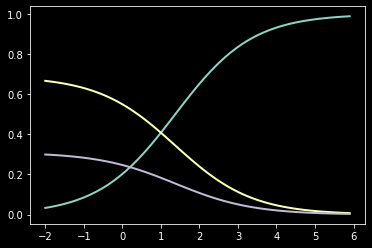

In [13]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x)/np.sum(np.exp(x),axis=0)

def MLP(x_train, x_test, y_train, y_test):

    print("MLP:")

    clf = MLPClassifier(random_state=1, max_iter=3000).fit(x_train, y_train)

    print(clf)
    print(clf.predict_proba(x_test[:1]))
    print(softmax(clf.predict_proba(x_test[:1])))
    print(clf.predict(x_test))
    ypred = clf.predict(x_test)
    print(y_test)
    print(clf.score(x_test, y_test))
    print(ypred)
    return ypred

MLP(x_train, x_test, y_train, y_test)

"""Softmax."""

scores = ypred

print(softmax(scores))

# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-2, 6, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

In [14]:
#from the Lecture:

import random
import numpy as np
from IPython.display import clear_output

# sigmoid and ReLU function
def sigmoid(x):
    return 1/(1+np.exp(-x))
def ReLU(x):
    return x * ( x > 0)

In [15]:
#the genitic algorithm from the lecture

class genetic_algorithm:
    def execute(pop_size,generations,threshold,x,y,network):
        class Agent:
            def __init__(self,network):
                class neural_network:
                    def __init__(self,network):
                        self.weights = []
                        self.activations = []
                        for layer in network:
                            if layer[0]!= None:
                                input_size=layer[0]
                            else:
                                input_size=network[network.index(layer)-1][1]
                            output_size = layer[1]
                            activation = layer[2]
                            self.weights.append(np.random.randn(input_size,output_size))
                            self.activations.append(activation)
                    def propagate(self,data):
                        input_data = data
                        for i in range(len(self.weights)):
                            z=np.dot(input_data,self.weights[i])
                            a=self.activations[i](z)
                            input_data=a
                        yhat=a
                        return yhat
                self.neural_network = neural_network(network)
                self.fitness = 0
            def __str__(self):
                    return 'Loss: ' + str(self.fitness[0])

        def generate_agents(population, network):
            return [Agent(network) for _ in range(population)]

        def fitness(agents,x,y):
            for agent in agents:
                yhat = agent.neural_network.propagate(x)
                cost = (yhat-y)**2
                agent.fitness=sum(cost)
            return agents

        def selection(agents):
            agents = sorted(agents, key=lambda agent: agent.fitness,reverse=False)
            print('\n'.join(map(str,agents)))
            agents = agents[:int(0.2 * len(agents))]
            return agents

        def unflatten(flattened,shapes):
            newarray = []
            index = 0
            for shape in shapes:
                size = np.product(shape)
                newarray.append(flattened[index : index + size].reshape(shape))
                index += size
            return newarray

        def crossover(agents,network,pop_size):
            offspring=[]
            for _ in range((pop_size- len(agents)) // 2):
                parent1 = random.choice(agents)
                parent2 = random.choice(agents)
                child1 = Agent(network)
                child2 = Agent(network)

                shapes = [a.shape for a in parent1.neural_network.weights]
                genes1 = np.concatenate([a.flatten() for a in parent1.neural_network.weights])
                genes2 = np.concatenate([a.flatten() for a in parent2.neural_network.weights])

                split = random.randint(0, len(genes1)-1)
                child1_genes = np.array(genes1[0:split].tolist() + genes2[split:].tolist())
                child2_genes = np.array(genes1[0:split].tolist() + genes2[split:].tolist())

                child1.neural_network.weights = unflatten(child1_genes, shapes)
                child2.neural_network.weights = unflatten(child2_genes, shapes)
                offspring.append(child1)
                offspring.append(child2)
            agents.extend(offspring)
            return agents


        def mutation(agents):
            for agent in agents:
                if random.uniform(0.0,1.0) <= 0.1:
                    weights = agent.neural_network.weights
                    shapes = [a.shape for a in weights]
                    flattened = np.concatenate([a.flatten() for a in weights])
                    randint = random.randint(0,len(flattened)-1)
                    flattened[randint] = np.random.randn()
                    newarray = []
                    indeweights = 0
                    for shape in shapes:
                        size=np.product(shape)
                        newarray.append(flattened[indeweights : indeweights + size].reshape(shape))
                        indeweights += size
                    agent.neural_network.weights = newarray
                    return agents
    


        for i in range(generations):
            print('Generation',str(i),':')
            agents = generate_agents(pop_size,network)
            agents = fitness(agents,x,y)
            agents = selection(agents)
            agents = crossover(agents,network,pop_size)
            agents = mutation(agents)
            agents = fitness(agents,x,y)

            if any(agent.fitness < threshold for agent in agents):
                print('Threshold met at generation' + str(i) + '!')
            if i % 100:
                clear_output()

        return agents[0]

In [17]:
#trying to run the code from the lecture:

x = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])
y = np.array([[0,1,1,0]]).T
network = [[3,10,sigmoid],[None,1,sigmoid]]

ga = genetic_algorithm
agent = ga.execute(100,100,0.1,x,y,network)
weights = agent.neural_network.weights
print(agent.fitness)
agent.neural_network.propagate(x)

[0.40062438]


array([[0.45995412],
       [0.69919567],
       [0.80867177],
       [0.2489515 ]])